<a href="https://colab.research.google.com/github/pagrkonecta/Konecta_Test/blob/main/Konecta_Test_PAGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


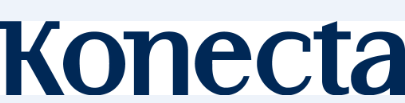

#**TECHNICAL TEST FOR THE SELECTION PROCESS OF THE COMPANY KONECTA**
#**---------------ANALYST DATA SCIENTIST---------------**

#Paola Andrea Giraldo Ramírez 
#Environmental Engineer
#March 2023

# Problem to be solved
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency was expected to peak in the third quarter  of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit cards for consumption and accumulated heavy credit and cash–card debts. The crisis caused a blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

## Dataset

This data were colected between April and September 2005, from an importan bank in Taiwan which issues both cash and credit cards. The researchers used a binary variable to represent default payment, where Yes was coded as 1 and No was coded as 0. This variable was considered the response variable in the study. The dataset contains 30000 total number of instances. The data will be download and imported from UCI ML repository: 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 


### Variables

This dataset has 24 variables, in which 23 are explanatory variables, some are user personal information, other related with amount of bill statement and the amount of previous payment in a specific month. Each variable will be described below: 

_______________________________________________
*User personal information:*

*   **ID**: Identity of each client (From 1 to 3000) - Categorical variable.
*   **LIMIT_BAL**: Total credit (Between 1000 and 1000000, given in Taiwan Dollars) it includes both the individual consumer credit and his/her family (supplementary) credit.
*   **SEX**: Gender (1 = Male; 2 = Female) - Categorical variable.
*   **EDUCATION**: Level of education (0 = Unknown; 1 = Graduate school; 2 = University; 3 = High school; 4 = Others; 5 = Unknown; 6 = Unknown).
*   **MARRIAGE**: Marital status (0 = Unknown; 1 = married; 2 = single; 3 = others) - Categorical variable.
*   **AGE**: Age in years - Numerical variable.

_______________________________________________
*History of past payments (This variables track the past monthly payment records, i.e. the delay of the payment referred to a specific month):* 

*   **PAY_0**: Repayment status in September  
*   **PAY_2**: Repayment status in August
*   **PAY_3**: Repayment status in July
*   **PAY_4**: Repayment status in June
*   **PAY_5**: Repayment status in May
*   **PAY_6**: Repayment status in April

*The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.*


_______________________________________________
*Amount of bill statement*